In [1]:
import pandas as pd
import numpy  as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('pizza_tutorial.csv')

In [11]:
df

,level_0,index,Player,90s,Tackles,Tkls Won,Tkls vs Dribbles,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Interceptions,Tkl+Int,Clearances,Errors
0,0,0,Patrick van Aanholt,19.7,1.62,0.96,0.71,1.37,3.45,6.55,2.84,1.02,1.57,1.73,3.35,2.03,0.05
1,1,3,Tosin Adarabioyo,29.8,1.28,0.77,0.57,0.54,1.78,3.66,1.64,0.23,1.17,1.68,2.95,7.38,0.03
2,2,6,Ola Aina,28.9,1.63,0.87,0.59,0.80,2.11,4.74,3.11,0.76,1.56,1.76,3.39,4.19,0.00
3,3,8,Semi Ajayi,27.9,2.04,1.47,0.65,0.54,4.48,7.46,3.33,0.57,1.90,1.25,3.30,4.70,0.07
4,4,12,Toby Alderweireld,21.9,1.55,0.73,0.59,0.50,2.97,5.16,3.06,0.14,1.96,0.46,2.01,6.80,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,86,489,Kyle Walker-Peters,26.7,2.92,1.57,0.94,1.12,4.38,7.68,5.09,1.46,2.28,1.42,4.34,2.40,0.04
87,87,490,Aaron Wan-Bissaka,33.0,2.94,1.58,0.64,0.58,4.09,5.82,5.06,1.94,3.36,1.97,4.91,3.21,0.00
88,88,491,Joel Ward,22.1,1.90,1.18,0.77,0.77,3.85,7.69,4.25,1.81,2.08,2.13,4.03,4.34,0.05
89,89,495,Adam Webster,25.8,1.05,0.70,0.50,0.47,2.87,3.10,3.06,0.85,1.71,1.47,2.52,4.11,0.00


In [8]:
df['Player']=df['Player'].str.split('\\',expand=True)[0]
df=df.loc[(df['Pos']=='DF') & (df['90s']>=15)]
df=df.drop(['Rk','Nation', 'Age', 'Born','Pos'],axis=1).reset_index()

<ipython-input-8-e5b4093f3d17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Player']=df['Player'].str.split('\\',expand=True)[0]


In [10]:
df=df.drop(['Squad'],axis=1).reset_index()

In [27]:
params=list(df.columns)
params=params[3:]

In [22]:
player=df.loc[df['Player']=='Patrick van Aanholt']

In [24]:
player=list(player.loc[0])
player=player[3:]

In [32]:
player

[19.7,
 1.62,
 0.96,
 0.71,
 1.37,
 3.45,
 6.55,
 2.84,
 1.02,
 1.57,
 1.73,
 3.35,
 2.03,
 0.05]

In [30]:
values=[]
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [31]:
values

[21, 45, 51, 56, 94, 61, 79, 36, 56, 29, 89, 61, 9, 66]

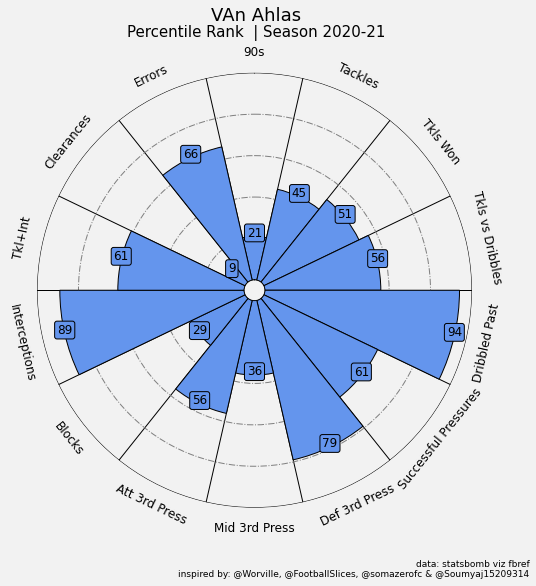

In [34]:
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
         va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
       
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "VAn Ahlas", size=18,
    ha="center",  color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank  | Season 2020-21",
    size=15,
    ha="center",  color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#000000",
    ha="right"
)

plt.show()